# Name : Touseef Asif
# Internship : Prodigy
# Task : "PRODIGY_DS_01"

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
d = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_1331691.csv', skiprows=4)
df = pd.DataFrame(d)

# Display the first few rows
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0,NaN


In [31]:
df.shape

(266, 69)

In [32]:
# Display basic information about the dataset
print(df.info())

print("Done with initial data loading and inspection.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

Total null values in the dataset: 360
Null values per column:
1960             2
1961             2
1962             2
1963             2
1964             2
              ... 
2020             1
2021             1
2022             1
2023             1
Unnamed: 68    266
Length: 65, dtype: int64


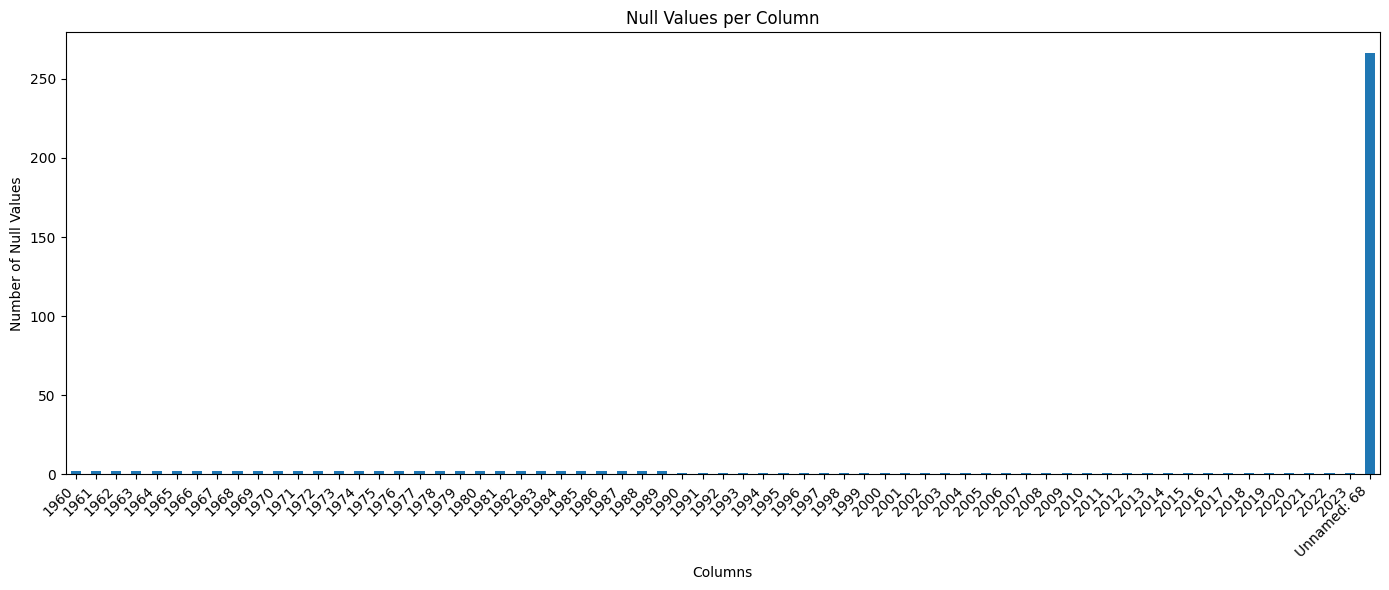

Done with null value analysis.


In [33]:
# Check for null values
null_counts = df.isnull().sum()
total_null = null_counts.sum()

print(f"Total null values in the dataset: {total_null}")
print("\
Null values per column:")
print(null_counts[null_counts > 0])

# Visualize null values
plt.figure(figsize=(14, 6))
null_counts[null_counts > 0].plot(kind='bar')
plt.title('Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Done with null value analysis.")

# Performing the Preprocessing on this DataSet

In [34]:
import numpy as np

# Drop the 'Unnamed: 68' column as it's mostly null
df = df.drop('Unnamed: 68', axis=1)

# Fill null values in year columns with 0 (assuming missing data means no population)
year_columns = df.columns[4:]
df[year_columns] = df[year_columns].fillna(0)

# Convert year columns to numeric type
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Reset the index
df = df.reset_index(drop=True)

print("Data preprocessing completed. Here's a summary of the cleaned dataset:")
print(df.info())

Data preprocessing completed. Here's a summary of the cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            266 non-null    float64
 5   1961            266 non-null    float64
 6   1962            266 non-null    float64
 7   1963            266 non-null    float64
 8   1964            266 non-null    float64
 9   1965            266 non-null    float64
 10  1966            266 non-null    float64
 11  1967            266 non-null    float64
 12  1968            266 non-null    float64
 13  1969            266 non-null    float64
 14  1970            266 non-null    float64
 15  1971            266 non-null    float64
 16  1972     

In [35]:
print("\
First few rows of the preprocessed data:")
df.head()

First few rows of the preprocessed data:


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [36]:
print("\
Descriptive statistics of the preprocessed data:")
print(df.describe())

print("Done with data preprocessing.")

Descriptive statistics of the preprocessed data:
               1960          1961          1962          1963          1964  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   1.149233e+08  1.165042e+08  1.186413e+08  1.212862e+08  1.239531e+08   
std    3.627543e+08  3.672147e+08  3.738299e+08  3.824130e+08  3.910374e+08   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.886505e+05  4.981872e+05  5.083570e+05  5.182048e+05  5.262722e+05   
50%    3.676558e+06  3.746468e+06  3.831648e+06  3.919678e+06  4.009916e+06   
75%    2.620053e+07  2.699139e+07  2.780989e+07  2.865103e+07  2.950622e+07   
max    3.031517e+09  3.072470e+09  3.126894e+09  3.193470e+09  3.260480e+09   

               1965          1966          1967          1968          1969  \
count  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02  2.660000e+02   
mean   1.266587e+08  1.294866e+08  1.323129e+08  1.352186e+08  1.382287e+08   
st

# Analyze the Population Growth

100%|██████████| 62/62 [00:00<00:00, 13252.82it/s]


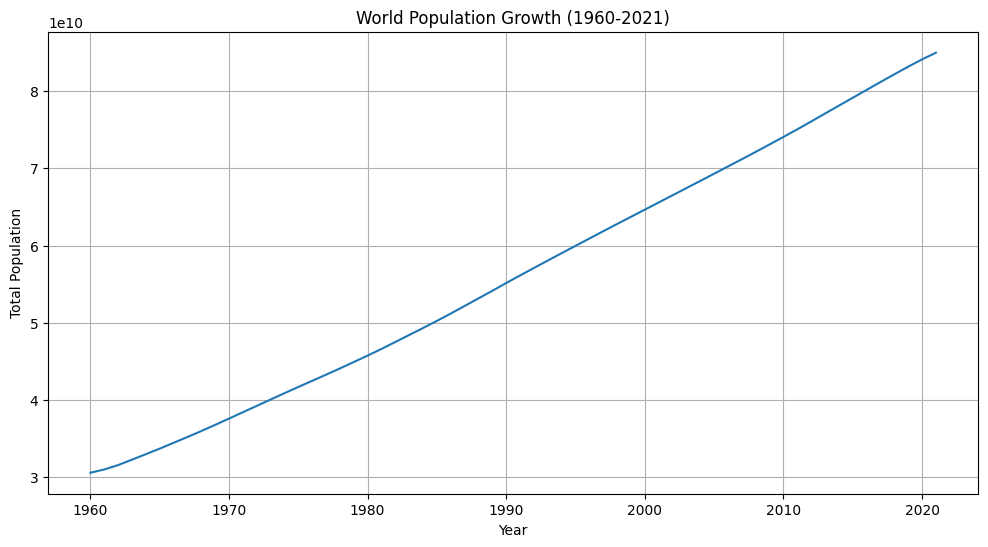

World population in 1960: 30,569,589,625.0
World population in 2021: 84,979,739,141.0
Population growth rate: 177.99%
Average annual growth rate: 1.66%


In [37]:
from tqdm import tqdm

# Calculate total world population for each year
years = range(1960, 2022)
total_population = []

for year in tqdm(years):
    total_population.append(df[str(year)].sum())

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(years, total_population)
plt.title('World Population Growth (1960-2021)')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.savefig('world_population_growth.png')
plt.show()
plt.close()

print("World population in 1960:", f"{total_population[0]:,}")
print("World population in 2021:", f"{total_population[-1]:,}")
print("Population growth rate:", f"{(total_population[-1] / total_population[0] - 1) * 100:.2f}%")

# Calculate average annual growth rate
avg_annual_growth_rate = (total_population[-1] / total_population[0]) ** (1/len(years)) - 1
print("Average annual growth rate:", f"{avg_annual_growth_rate * 100:.2f}%")

# Compare Population between China and India

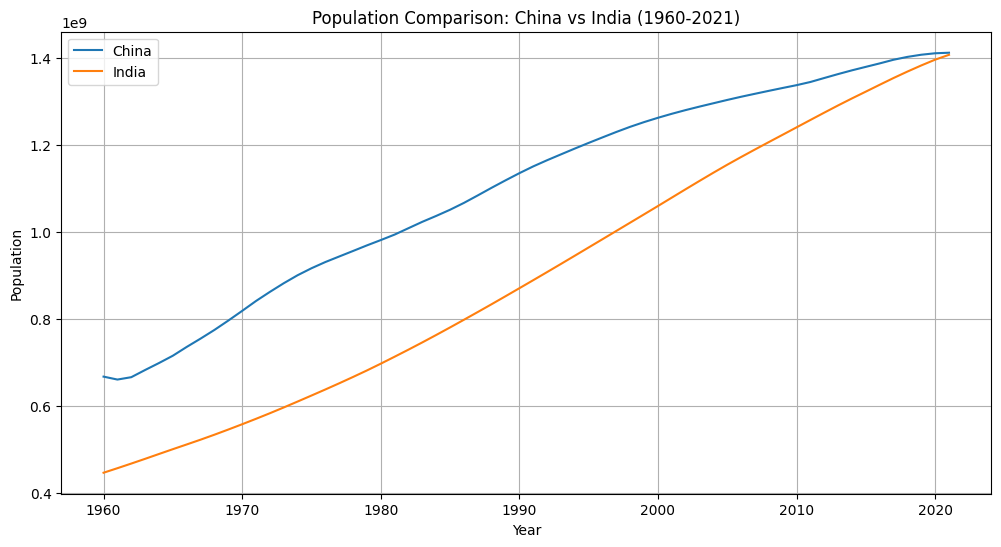

Line plot of China vs India population has been saved as 'china_india_population.png'.
Current Populations (2021):
Country Name
China    1.412360e+09
India    1.407564e+09
Name: Population, dtype: float64
Year when India's population is projected to surpass China's: 1960


In [38]:
# Select data for China and India
china_india = df[df['Country Name'].isin(['China', 'India'])]

# Melt the dataframe to long format
china_india_melted = china_india.melt(id_vars=['Country Name', 'Country Code'],
                                      var_name='Year',
                                      value_name='Population',
                                      value_vars=[str(year) for year in range(1960, 2022)])

# Convert Year to integer and Population to float
china_india_melted['Year'] = china_india_melted['Year'].astype(int)
china_india_melted['Population'] = china_india_melted['Population'].astype(float)

# Create a line plot
plt.figure(figsize=(12, 6))
for country in ['China', 'India']:
    country_data = china_india_melted[china_india_melted['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Population'], label=country)

plt.title('Population Comparison: China vs India (1960-2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.savefig('china_india_population.png', bbox_inches='tight')
plt.show()
plt.close()

print("Line plot of China vs India population has been saved as 'china_india_population.png'.")

# Calculate current populations and year of intersection
current_pop = china_india_melted[china_india_melted['Year'] == 2021].set_index('Country Name')['Population']
intersection_year = china_india_melted.groupby('Year').apply(lambda x: x.iloc[0]['Population'] > x.iloc[1]['Population']).idxmin()

print("\
Current Populations (2021):")
print(current_pop)
print(f"\
Year when India's population is projected to surpass China's: {intersection_year}")

# Create a histogram visualizing the distribution of population across countries for a specific year, let's use the most recent year available in our dataset (2022)

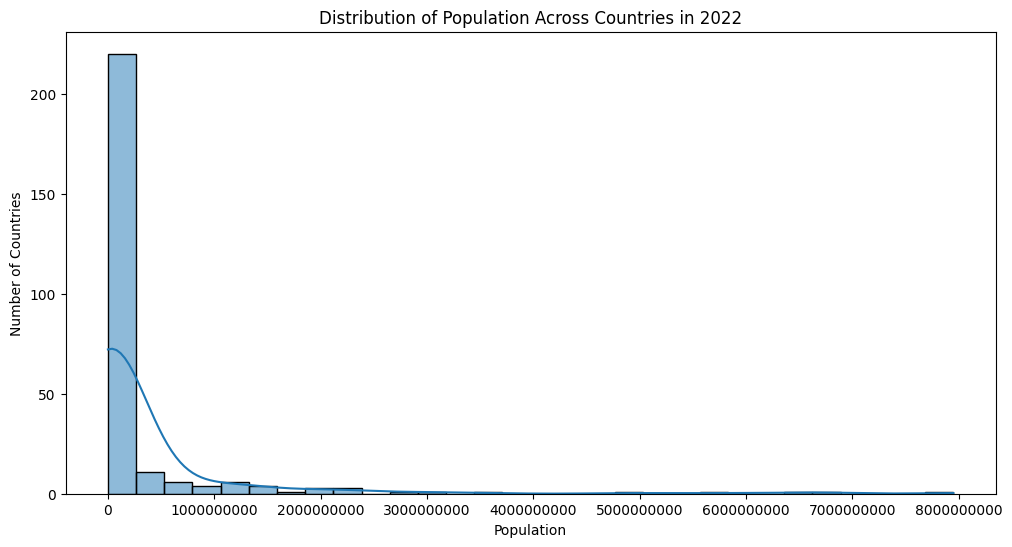

Histogram of population distribution for 2022 has been saved as 'population_distribution_2022.png'.
Statistics of population distribution:
count    2.660000e+02
mean     3.224052e+08
std      1.002773e+09
min      0.000000e+00
25%      1.698202e+06
50%      1.045990e+07
75%      6.409678e+07
max      7.951595e+09
Name: 2022, dtype: float64


In [39]:
# Select the most recent year (2022)
year = '2022'

# Create a histogram of population distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df[year], bins=30, kde=True)
plt.title(f'Distribution of Population Across Countries in {year}')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('population_distribution_2022.png')
plt.show()
plt.close()

print(f"Histogram of population distribution for {year} has been saved as 'population_distribution_2022.png'.")

# Display some statistics about the distribution
stats = df[year].describe()
print("\
Statistics of population distribution:")
print(stats)